## Gene Enrichment analysis

In [2]:
!pip install gseapy

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina' 
%load_ext autoreload
%autoreload 2
import csv
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import gseapy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
names = gseapy.get_library_name()
print(names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_2022', 'DisGeNET', 'Disease_Per

In [32]:
gene_list_more2 = "FLG,AHNAK2,TTN,EPPK1,CHGB,PLEC,PLIN4,MUC5AC,AHNAK,RRBP1,HSPG2,HLA-B,SYNE2,TG,IGHG3,AKAP12,LAMA5,HLA-C,PARP4,OBSCN,FCGBP,SYNM,NEB,MYOM3,RPL14,SMTN,NRAP,HLA-DRB5,TNS1,HLA-DRB1,SYNE1,PRUNE2,C8A,CD99,SYNPO2,COL6A2,TNC,TPSAB1,LAMA2,LMO7,IGHA2,DMD,IQGAP2,MYH6,SPTA1,HLA-DQB1,COL6A3,GSN,PDLIM5,LAMC3,PPL,SORBS3,MYLK,TACC2,GSTP1,GAA,HCLS1,TNXB,MYH11,IGHV4-59,SAA1,IGHG2,ENO3,NID2,PCNT,MUC1,MTTP,NIBAN1,TXNRD2,MAP4,SVIL,NOP56,SORBS1,LRRFIP1,PITRM1,MMUT,GBP6,IFI16,FRAS1,IGHG4,F13A1,GSTO1,GPX1,CP,LAMB1,FLNB,IGKV1-39,TJP2,ACIN1,DST,GBP1,SEPTIN9,MACF1,GOLGA3,MYOM2,TPO,POTEE,GFAP,DNAJC10,IGHG1,ITIH5,IGHV1-69D,TOR1AIP1,SERPINB3,HMCN2,CTSB,NID1,MUC2,SIRPA,SERPINA1,FLG2,SPRR3,MMP9,PRX,COBL,RNF213,MYOM1,SLK,SPARCL1,IGHV3-48,LAMA4,SPTB,PCMT1,FLNA,MAN2B1,VWF,SLC30A9,THRAP3,LTF,ALDH1L1,SLC38A10,PRRC2C,FAM120B,LAMA3,TNKS1BP1,LAD1,GOLGB1,PDIA4,LTBP4,NUCB2,FKBP15,NES,OVGP1,FYCO1,ECHDC3,ASAH1,FTCD,SYTL4,VWA8,GC,CROCC2,BSN,CTSC,IGHV2-70,KRT7,C7,PDCD4,MGAM,CORO7,IGHV3-74,LAMC1,CAPN2,ADD1,PGM1,MYH9,ESD,PCSK1,IGKV1D-37,MYH3,SDHA,MYO18A,TTLL12,WDFY4,SEC23A,CPPED1,IGHV3-30,CR1,IGKC,SCRN2,IGHV4-31,ELAPOR1,TMEM43,EEF1A2,ALPP,MLIP,ECM1,ADPRHL1,ITIH4,CAMKK1,ANPEP,AEBP1,CFH,MAVS,GSTM1,PLBD1,H1-6,IGHV4-4,APIP,A2M,MIA3,HRG,SERPINB10,ECI2,KANK4,ERAP1,APOB,FGL1,CLU,HEXB,POF1B,ALDH5A1,DSP,TRDN,TEP1,CHGA,C3,KRT16,MPRIP,EPHX1,PCK1,POTEJ,R3HCC1,IGKV1-27,SWAP70,ENPEP,GLOD4,AKAP13,WASHC1,HDGF,CYP2C9,SPINK5,SPEF2,TF,STEAP2,MLPH,ALDH4A1,IGKV4-1,STING1,PRKDC,LDB3,GH1,IGHV4-61,PALM,MYO9B,ITPKB,H4C6,EPS8L1,PANK4,CHID1,ARHGEF40,HLA-A,PYGB,EEF1D,POTEI,CMPK1,LACTB,BAG3,KRT13,MYO7B,CEACAM5,NCOA7,GPLD1,WASHC2A,PDPR,AKAP5,PUS3,TRIM5,TBC1D17,VIL1,ATXN1,BDH2,EPB41L3,IGHV3-20,C11orf16,CFHR1,TAP1,GRHPR,MPP7,IGHV3-53,RPN2,PLIN3,PALM2AKAP2,MEGF6,TKFC,PDIA2,HEPACAM,ASS1,CBR4,PSG5,PATJ,ABCC6,SYN2,HSPA4L,OLFML1,MRC1,RSPH3,COL6A1,CENPV,PRODH,RBM19,C17orf80,MEAK7,ECH1,ACTN2,DMGDH,SLC2A9,HEATR1,NAALADL2,LAMA1,PRAM1,MKI67,FAM83H,EML2,XPC,CELA2B,RPL13,MINK1,CEACAM3,IGLV2-14,CEP170,ADH1C,IGKV1D-39,NAPRT,HLA-DPA1,C1orf116,IGHA1,TMEM128,SULT1A1,HDHD3,PGLYRP2,STK31,MYH2,FREM2,WDR1,EFHB,IGHV3-38,CKAP4,PON1,FBN2,OTC,ZG16,EVPL,ACACB,AK1,CLIC6,FMO3,GHDC,CLIP1,POTEF,ACAT2,PLXNB2,PSMD13,HMCN1,AKAP9,VPS8,TAPBPL,TINAG,PRKCSH,CPS1,C4A,RIN3,CAND2,AOC3,CEBPZ,GLRX5,TRAP1,TGM3,AP3B1,HEXA,ARHGAP45,ERICH3,DPP3,ITGA8,ASMTL,PNPT1,RIOX2,OPLAH,IFITM2,DPP7,CALCOCO2,CPOX,KRT2,ADAR,LRRK2,FHL5,MUC12,PIR,A2ML1,CYBA,IGLV2-18,LUZP1,SRP14,MYBBP1A,RPL8,IGKV3-11,LGALS8,IVL,COL15A1,MATN2,ICAM1,CES1,NMI,IFITM1,KRT20,STEAP4,PGM2L1,MTMR6,PRAG1,ESYT2,TNS3,AKR1A1,WASHC4,PDLIM1,IGHV3-23,NCOR2,UMPS,FMN1,SDR39U1,IGHV2-70D,HAAO,SYNC,PFAS,AGXT2,LRP1,ACAA1,PLA2G4C,TFRC,PLXND1,EMC1,CAST,VPS13C,IGLV1-51,FABP1,HTT,HLA-DPB1,CRIP1,SEPTIN11,PALM3,CST1,KTN1,LHB,DENND2B,KANK3,PIEZO1,IGLV3-21,APOBR,CAVIN3,PDCD6IP,EIF3J,SORD,ADH1B,UGT2B15,DMKN,CPT2,HSD17B4,PAPLN,CDH11,OGFR,MDN1,WASHC2C,ACTN3,TTC38,SLC44A2,ELP2,CYP1B1,TDRP,ARVCF,PIGR,POLR1A,CYBRD1,GOLGA1,POSTN,NEFH,NACAD,ANKLE2,IGHV1-69,GOLGA4,RBP5,MUC16,ALDH1B1,NIPSNAP3B,AFM,C4B,TGM4,CMYA5,BCAS1,GLRX3,IGHV4-39,ALDH1A2,FAM171B,AKR1C3"

gene_list_more2 = gene_list_more2.split(",")
gene_list_more2_function = gp.enrichr(gene_list=gene_list_more2,
 gene_sets=['GO_Molecular_Function_2023'],
 organism='Human', 
 outdir='enrish_analysis',
 cutoff=0.5 
 )
gene_list_more2_function.results.head(20)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2023,Cadherin Binding (GO:0045296),32/319,1.685207e-11,4.295761e-09,0,0,4.669324,115.829798,MACF1;LAD1;AHNAK;EVPL;PPL;ADD1;PDLIM1;GOLGA3;P...
1,GO_Molecular_Function_2023,Actin Binding (GO:0003779),24/183,2.353841e-11,4.295761e-09,0,0,6.254293,153.057475,MACF1;GSN;LRRK2;SYNPO2;COBL;LDB3;MYO9B;SORBS1;...
2,GO_Molecular_Function_2023,Muscle Alpha-Actinin Binding (GO:0051371),5/14,1.456251e-05,1.370891e-03,0,0,22.290809,248.254084,PDLIM1;SYNPO2;NRAP;PDLIM5;TTN
3,GO_Molecular_Function_2023,Alpha-Actinin Binding (GO:0051393),6/23,1.502347e-05,1.370891e-03,0,0,14.184597,157.532671,PDLIM1;SYNPO2;NRAP;LDB3;PDLIM5;TTN
4,GO_Molecular_Function_2023,Aldehyde Dehydrogenase (NAD+) Activity (GO:000...,4/14,2.953199e-04,1.796529e-02,0,0,16.015606,130.166057,ALDH4A1;ALDH1L1;ALDH1B1;ALDH1A2
5,GO_Molecular_Function_2023,Aldehyde Dehydrogenase [NAD(P)+] Activity (GO:...,4/14,2.953199e-04,1.796529e-02,0,0,16.015606,130.166057,ALDH4A1;ALDH1L1;ALDH1B1;ALDH1A2
6,GO_Molecular_Function_2023,Protein-Glutamine Gamma-Glutamyltransferase Ac...,3/7,4.781741e-04,2.489898e-02,0,0,29.976947,229.189818,F13A1;TGM4;TGM3
7,GO_Molecular_Function_2023,"Oxidoreductase Activity, Acting On The CH-OH G...",9/95,5.457311e-04,2.489898e-02,0,0,4.217094,31.684651,GRHPR;BDH2;ADH1C;ADH1B;AKR1A1;SORD;AKR1C3;HSD1...
8,GO_Molecular_Function_2023,NAD-retinol Dehydrogenase Activity (GO:0004745),4/19,1.037380e-03,4.207151e-02,0,0,10.674333,73.343951,ADH1C;ADH1B;AKR1A1;AKR1C3
9,GO_Molecular_Function_2023,Vinculin Binding (GO:0017166),3/10,1.551610e-03,5.663378e-02,0,0,17.127049,110.785665,SYNM;DMD;SORBS3


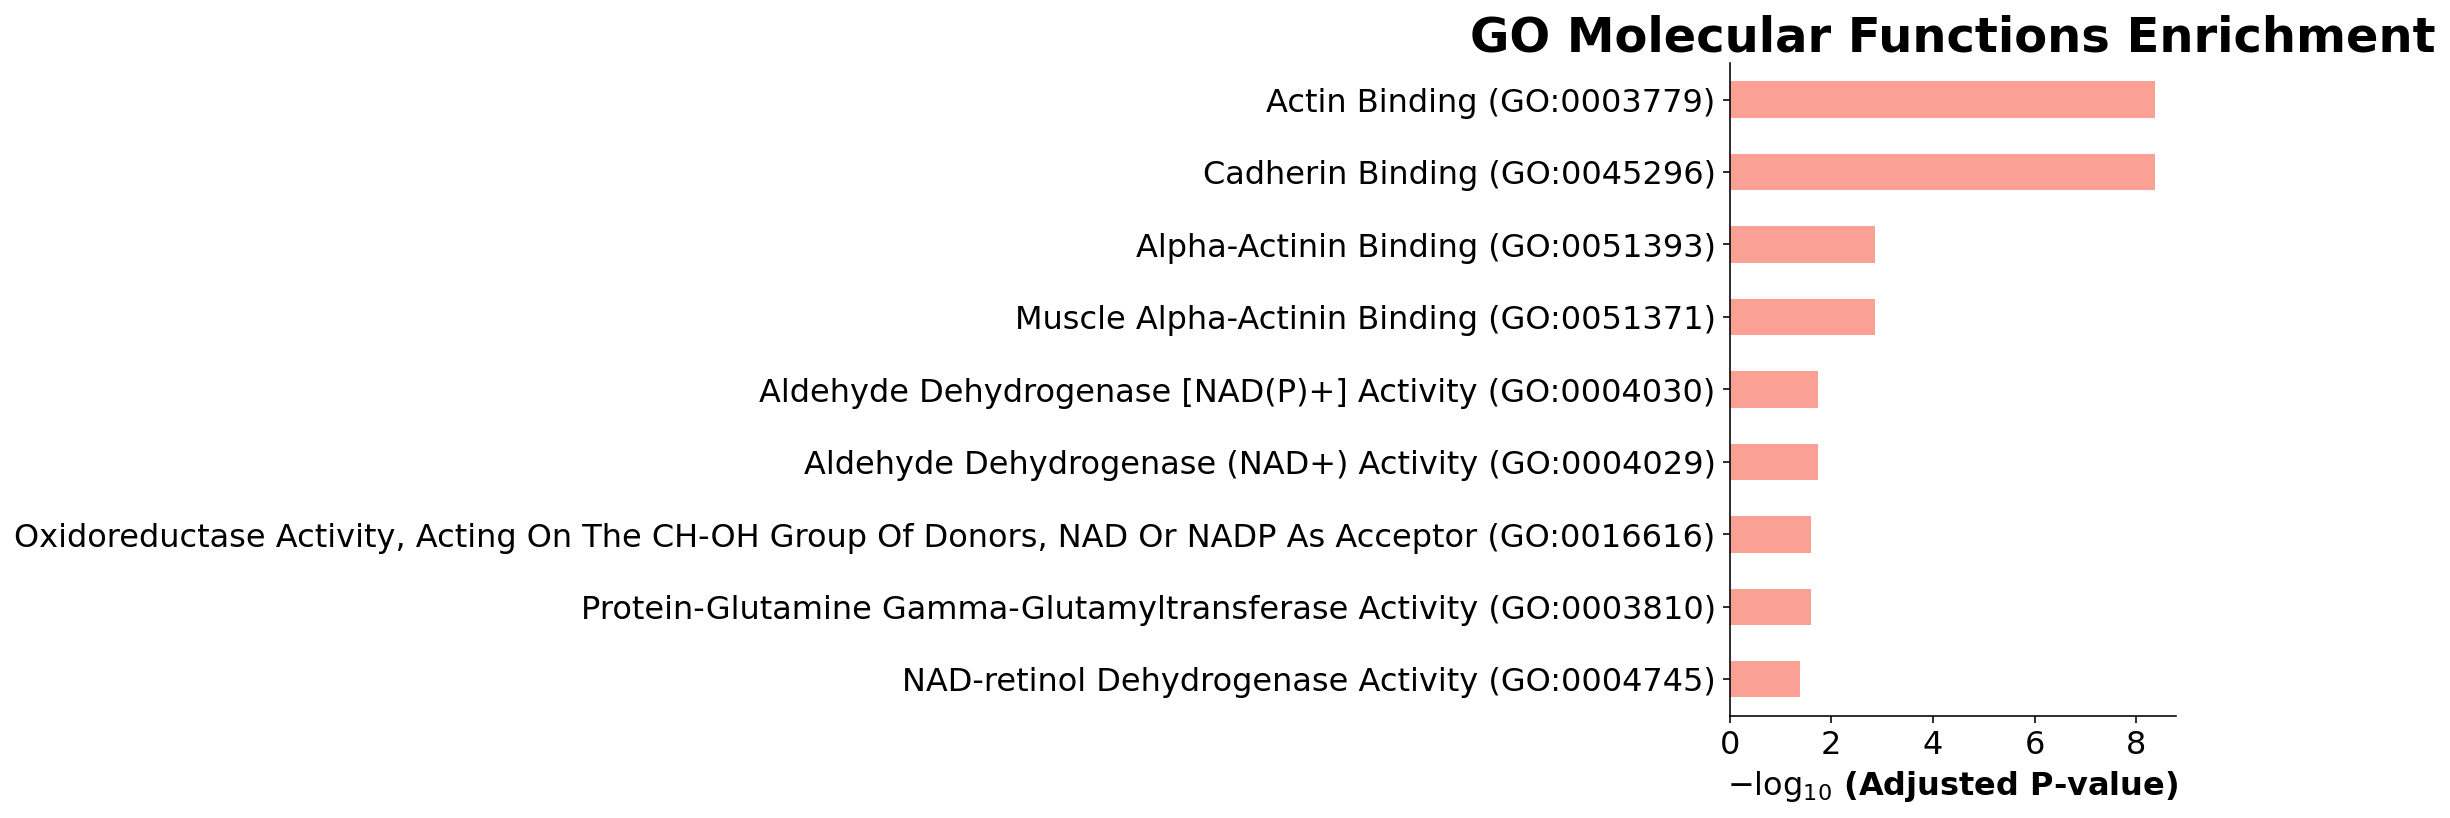

In [36]:
from gseapy.plot import barplot, dotplot
ax = barplot(gene_list_more2_function.res2d,title='GO Molecular Functions Enrichment')
ax.figure.savefig("GO_Functions_Enrich.svg")

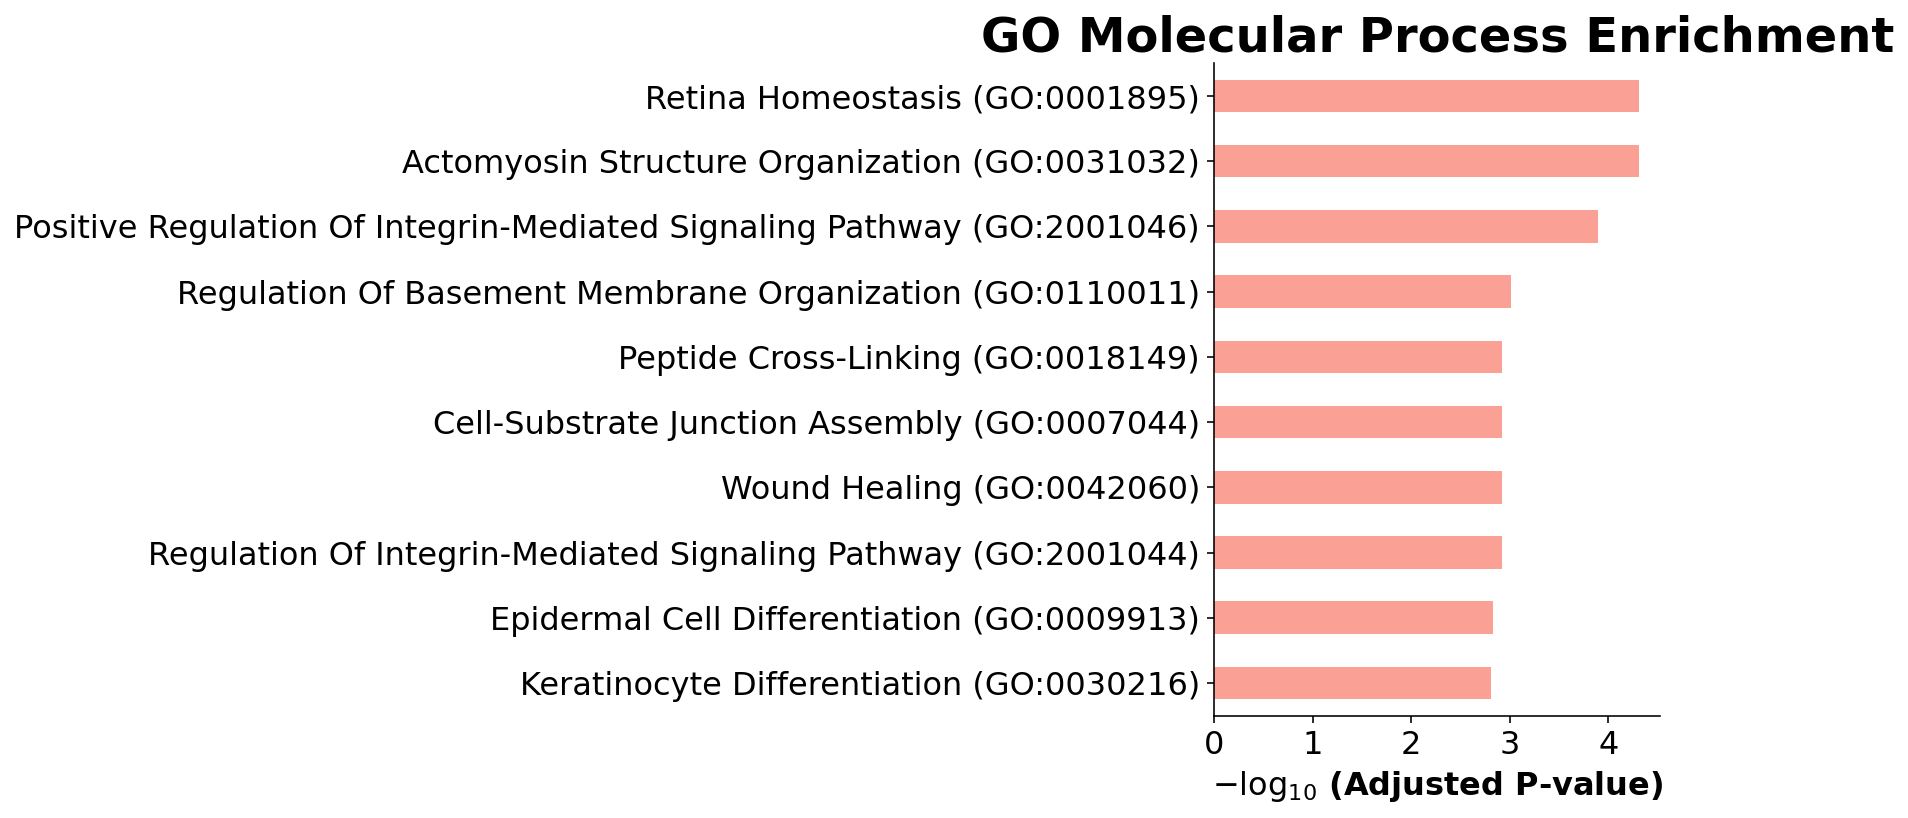

In [37]:
gene_list_more2_process = gp.enrichr(gene_list=gene_list_more2 ,
 gene_sets=['GO_Biological_Process_2023'],
 organism='Human', 
 outdir='enrish_analysis',
 cutoff=0.5 
 )
ax = barplot(gene_list_more2_process.res2d,title='GO Molecular Process Enrichment')
ax.figure.savefig("GO_Process_Enrich.svg")

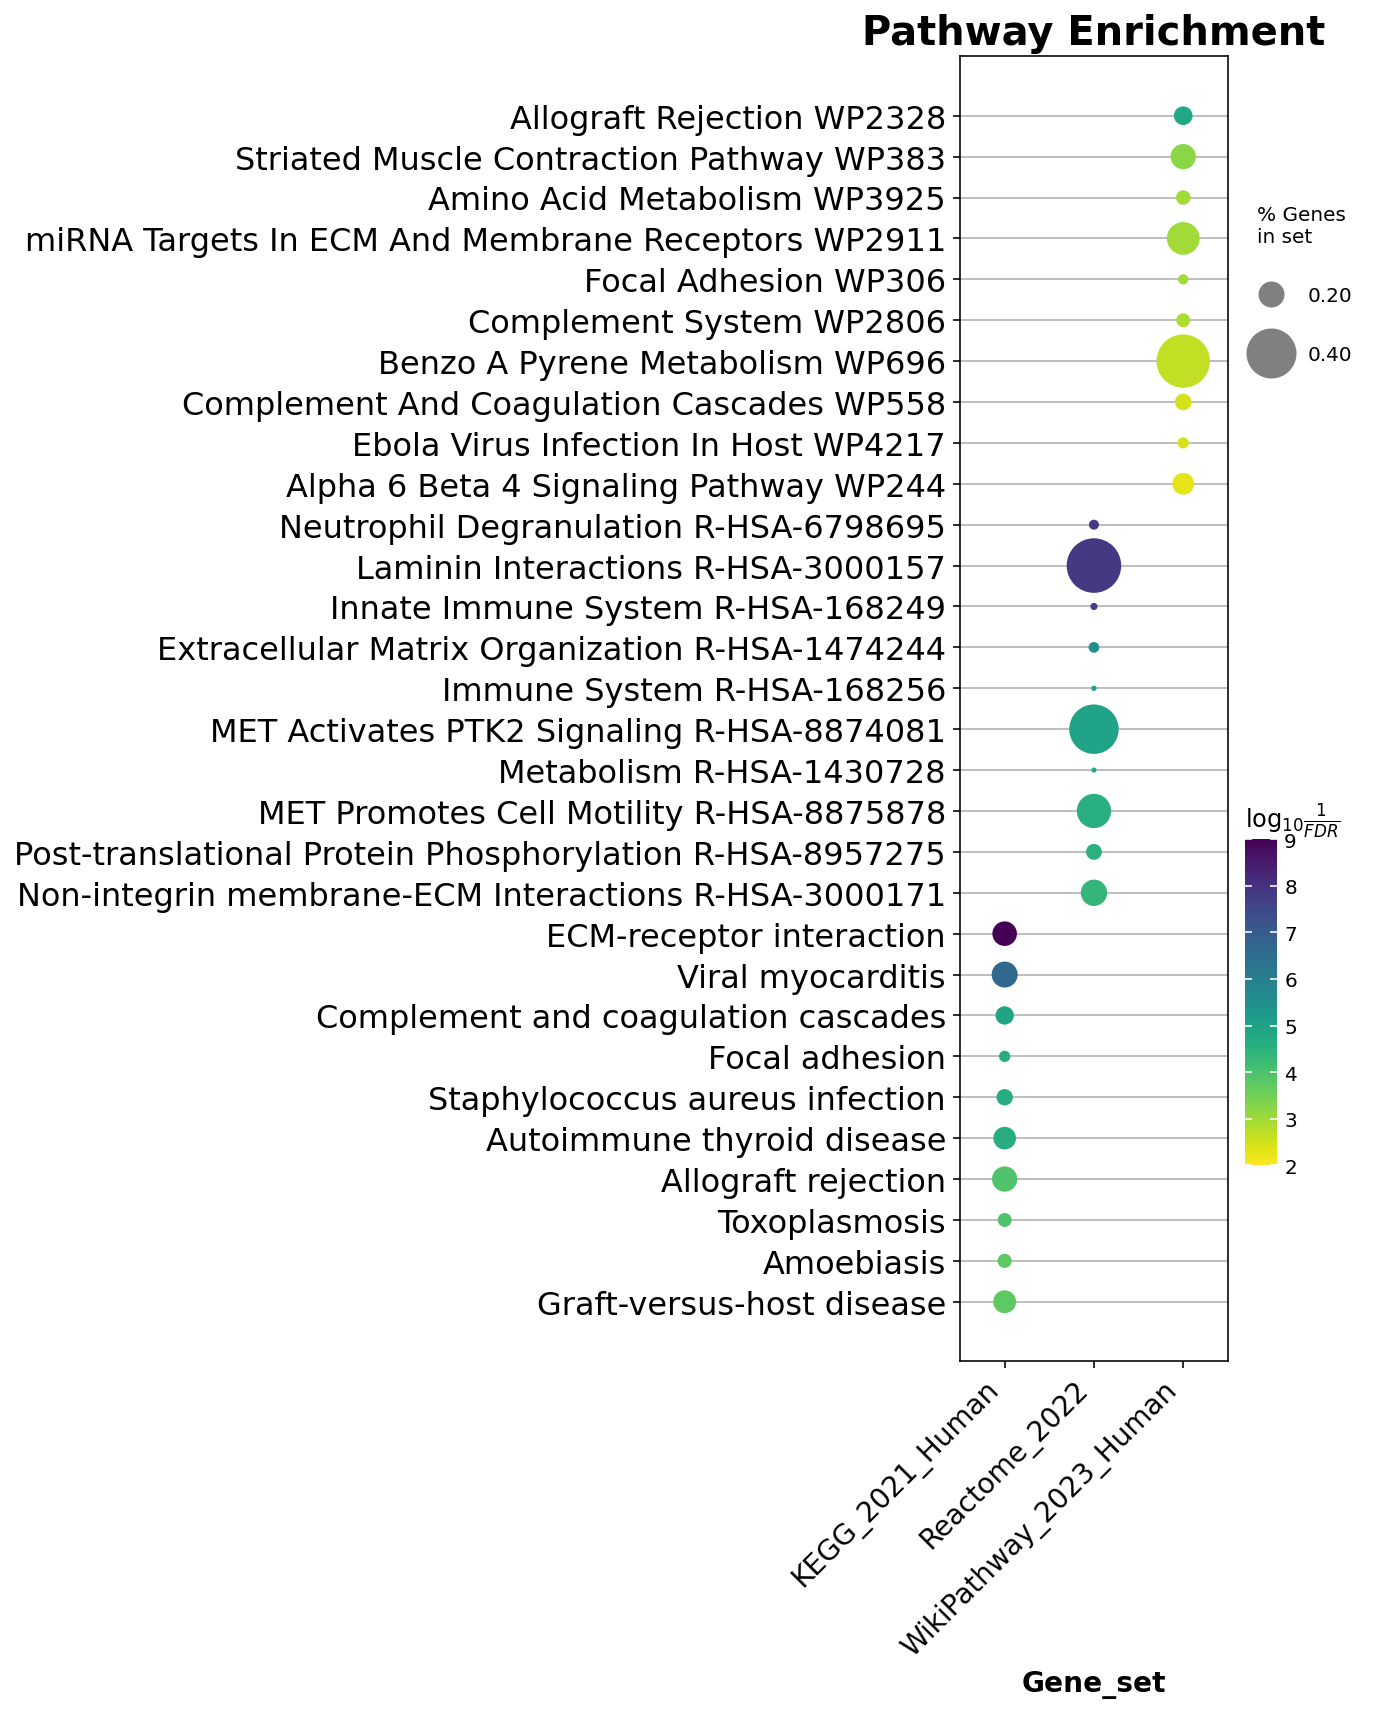

In [58]:
gene_list_more2_pathway = gp.enrichr(gene_list=gene_list_more2 ,
 gene_sets=['Reactome_2022','KEGG_2021_Human', 'WikiPathway_2023_Human'],
 organism='Human', 
 outdir='enrish_analysis',
 cutoff=0.5 
 )
ax = dotplot(gene_list_more2_pathway.results,title='Pathway Enrichment', 
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              xticklabels_rot=45, # rotate xtick labels
              show_ring=False, # set to False to revmove outer ring
              marker='o',
              figsize=(3,12),
            )
ax.figure.savefig("Pathway_Enrich.svg")

In [67]:
import pandas as pd
from scipy import stats

# Load your data into a pandas DataFrame
# Assuming df has columns: 'Gene', 'NumberOfPeptides'
df = pd.read_csv('count-tables/gene_symbol_peps.tsv', sep="\t")
df.head()

# Calculate the overall mean and standard deviation of the number of peptides
overall_mean = df['Count'].mean()
overall_std = df['Count'].std()

# Initialize a dictionary to store the results
results = {}

# Perform hypothesis testing for each gene
for _, row in df.iterrows():
    gene = row['gene_symbol']
    num_peptides = row['Count']
    
    # Perform a one-sample t-test comparing the gene's number of peptides to the overall mean
    # Since we're comparing a single gene's count to the population mean, use a z-score:
    z_score = (num_peptides - overall_mean) / overall_std
    p_value = stats.norm.sf(abs(z_score)) * 2  # two-tailed test for the z-score
    
    # If the p-value is less than 0.01, the gene's expression is considered significantly different
#     if p_value < 0.01:
    results[gene] = {'Count': num_peptides, 'PValue': p_value}

# Output the list of genes that are significantly different under the p-value threshold
print("Genes significantly different under p-value threshold of 0.01:")
for gene, stats in results.items():
    print(f"Gene: {gene}, Number of Peptides: {stats['Count']}, P-Value: {stats['PValue']:.5f}")
for gene, stats in results.items(): 
    print(gene)

Genes significantly different under p-value threshold of 0.01:
Gene: FLG, Number of Peptides: 50, P-Value: 0.00000
Gene: AHNAK2, Number of Peptides: 45, P-Value: 0.00000
Gene: TTN, Number of Peptides: 41, P-Value: 0.00000
Gene: EPPK1, Number of Peptides: 28, P-Value: 0.00000
Gene: CHGB, Number of Peptides: 26, P-Value: 0.00000
Gene: PLEC, Number of Peptides: 23, P-Value: 0.00000
Gene: PLIN4, Number of Peptides: 23, P-Value: 0.00000
Gene: MUC5AC, Number of Peptides: 21, P-Value: 0.00000
Gene: AHNAK, Number of Peptides: 20, P-Value: 0.00000
Gene: RRBP1, Number of Peptides: 19, P-Value: 0.00000
Gene: HSPG2, Number of Peptides: 19, P-Value: 0.00000
Gene: HLA-B, Number of Peptides: 18, P-Value: 0.00000
Gene: SYNE2, Number of Peptides: 18, P-Value: 0.00000
Gene: TG, Number of Peptides: 17, P-Value: 0.00000
Gene: IGHG3, Number of Peptides: 16, P-Value: 0.00000
Gene: AKAP12, Number of Peptides: 15, P-Value: 0.00000
Gene: LAMA5, Number of Peptides: 15, P-Value: 0.00000
Gene: HLA-C, Number of Pe

HLA-B
SYNE2
TG
IGHG3
AKAP12
LAMA5
HLA-C
PARP4
OBSCN
FCGBP
SYNM
NEB
MYOM3
RPL14
SMTN
NRAP
HLA-DRB5
TNS1
HLA-DRB1
SYNE1
PRUNE2
C8A
CD99
SYNPO2
COL6A2
TNC
TPSAB1
LAMA2
LMO7
IGHA2
DMD
IQGAP2
MYH6
SPTA1
HLA-DQB1
COL6A3
GSN
PDLIM5
LAMC3
PPL
SORBS3
MYLK
TACC2
GSTP1
GAA
HCLS1
TNXB
MYH11
IGHV4-59
SAA1
IGHG2
ENO3
NID2
PCNT
MUC1
MTTP
NIBAN1
TXNRD2
MAP4
SVIL
NOP56
SORBS1
LRRFIP1
PITRM1
MMUT
GBP6
IFI16
FRAS1
IGHG4
F13A1
GSTO1
GPX1
CP
LAMB1
FLNB
IGKV1-39
TJP2
ACIN1
DST
GBP1
SEPTIN9
MACF1
GOLGA3
MYOM2
TPO
POTEE
GFAP
DNAJC10
IGHG1
ITIH5
IGHV1-69D
TOR1AIP1
SERPINB3
HMCN2
CTSB
NID1
MUC2
SIRPA
SERPINA1
FLG2
SPRR3
MMP9
PRX
COBL
RNF213
MYOM1
SLK
SPARCL1
IGHV3-48
LAMA4
SPTB
PCMT1
FLNA
MAN2B1
VWF
SLC30A9
THRAP3
LTF
ALDH1L1
SLC38A10
PRRC2C
FAM120B
LAMA3
TNKS1BP1
LAD1
GOLGB1
PDIA4
LTBP4
NUCB2
FKBP15
NES
OVGP1
FYCO1
ECHDC3
ASAH1
FTCD
SYTL4
VWA8
GC
CROCC2
BSN
CTSC
IGHV2-70
KRT7
C7
PDCD4
MGAM
CORO7
IGHV3-74
LAMC1
CAPN2
ADD1
PGM1
MYH9
ESD
PCSK1
IGKV1D-37
MYH3
SDHA
MYO18A
TTLL12
WDFY4
SEC23A
CPPED1
IGHV3-30
CR1
IGK

SBF2
PPP1R9A
ZNF598
FAM160B2
MGA
C12orf29
CTSG
SLC5A6
INPP5D
LRPPRC
ALDH9A1
TCIRG1
TBC1D9B
RUSF1
TRIM33
DDTL
SLC52A3
ANKRD22
MINDY1
ZMYM5
CCDC69
GTPBP10
HSP90B1
ZCCHC4
SKAP2
CHST3
SERPINA5
KRT24
METTL2B
VPS33B
MT1F
RAB6C
PLEK
GRWD1
H3C14
MICALL1
PPP1R32
BOLA2B
JMJD1C
VAV2
IDUA
AP5Z1
MTA1
DSG2
PARP10
CDK13
PMP2
PIP4K2A
RYR2
CTAGE6
CDC42BPA
LYRM4
CTAGE15
AGAP9
CBWD2
USE1
HPR
ARSL
RSL1D1
GPC6
LCLAT1
CYP8B1
CROT
EIF2A
SULT1A2
ACOT4
TEKT2
TSFM
LRP3
IST1
DBH
EFNA1
UGT2B11
IGHV1-2
HAGH
TUSC1
DLG5
TRIM9
ABCA6
SMTNL1
CALB2
MOGAT2
SEMA4B
ZFYVE19
PRODH2
CRACR2A
FGL2
HBS1L
PZP
KLF16
GGA3
VARS1
NIN
POMGNT1
SPATA20
FGGY
CELSR1
IGSF10
SFTPA1
TMED5
LOXL4
TCHH
SPICE1
MOXD1
ETFA
HABP2
SIRT3
DCAF13
DYSF
ANKRD44
KCP
ALDH7A1
RAB35
PSG4
GSTA3
MMAB
NOX4
GALNS
TTC1
GOLGA2
FAM114A2
UTP20
ENGASE
PEX5
MRI1
CENPC
EMILIN1
CTNNA3
HYDIN
AMY1B
ITGA5
HIP1R
LIPT2
IRF2BPL
HSPA4
C1orf87
GALC
ICAM5
GLMP
SBSN
TMEM132A
BOD1L1
APOL2
HKDC1
SLC25A15
PPP2R5A
TRIM63
LONRF2
MYO5C
SLCO1B1
DPEP1
TMEM106B
RBM45
VNN2
ADCK2
PRCC
KIAA1